<a href="https://colab.research.google.com/github/Tabish247/CV/blob/main/McDonalds_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# McDonald's Customer Segmentation Analysis

This notebook performs market segmentation using K-Means Clustering on the McDonald's dataset.
The goal is to identify unique customer segments based on their preferences, demographics, and behaviors.


In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:

# Load dataset
df = pd.read_csv('/content/mcdonalds.csv')
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## Data Preprocessing

In [3]:

# Encoding binary categorical variables (Yes/No to 1/0)
binary_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
               'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# Encode 'VisitFrequency' and 'Gender'
le = LabelEncoder()
df['VisitFrequency'] = le.fit_transform(df['VisitFrequency'])
df['Gender'] = le.fit_transform(df['Gender'])

# Check the processed data
df.head()


<ipython-input-3-b92efc3a1ab6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1


In [6]:

# Features for clustering
features = binary_cols + ['Age', 'VisitFrequency', 'Gender', 'Like']
X = df[features]

# Convert 'Like' column to numerical representation
# Assuming 'Like' has ordinal data, you can use Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Like'] = le.fit_transform(X['Like']) # Convert 'Like' to numerical using Label Encoding

# Alternatively, if 'Like' has specific categories you want to map to numbers:
# like_mapping = {'I hate it!-5': -5, 'I love it!+5': 5, ...} # Define your mapping
# X['Like'] = X['Like'].map(like_mapping)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Finding the Optimal Number of Clusters using the Elbow Method

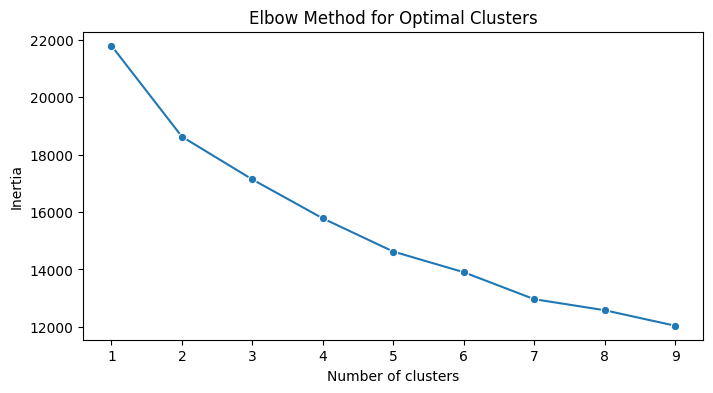

In [7]:

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 10), y=inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## Running KMeans Clustering

In [8]:

# Based on the elbow plot, let's assume the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster distribution
df['Cluster'].value_counts()


,count
Cluster,
3,615
0,335
2,327
1,176


## Cluster Analysis

Cluster Profiles:
            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.017910    0.680597  0.077612   0.958209  0.761194  0.782090   
1        0.710227    0.931818  0.130682   0.000000  0.085227  0.926136   
2        0.792049    0.978593  0.128440   0.990826  0.623853  0.877676   
3        0.671545    0.986992  0.073171   1.000000  0.473171  0.969106   

            cheap     tasty  expensive   healthy  disgusting        Age  \
Cluster                                                                   
0        0.400000  0.065672   0.540299  0.032836    0.811940  48.934328   
1        0.687500  0.801136   0.215909  0.596591    0.034091  50.193182   
2        0.116208  0.862385   0.914373  0.177370    0.134557  39.174312   
3        0.938211  0.798374   0.003252  0.186992    0.050407  43.534959   

         VisitFrequency    Gender      Like  
Cluster                                 

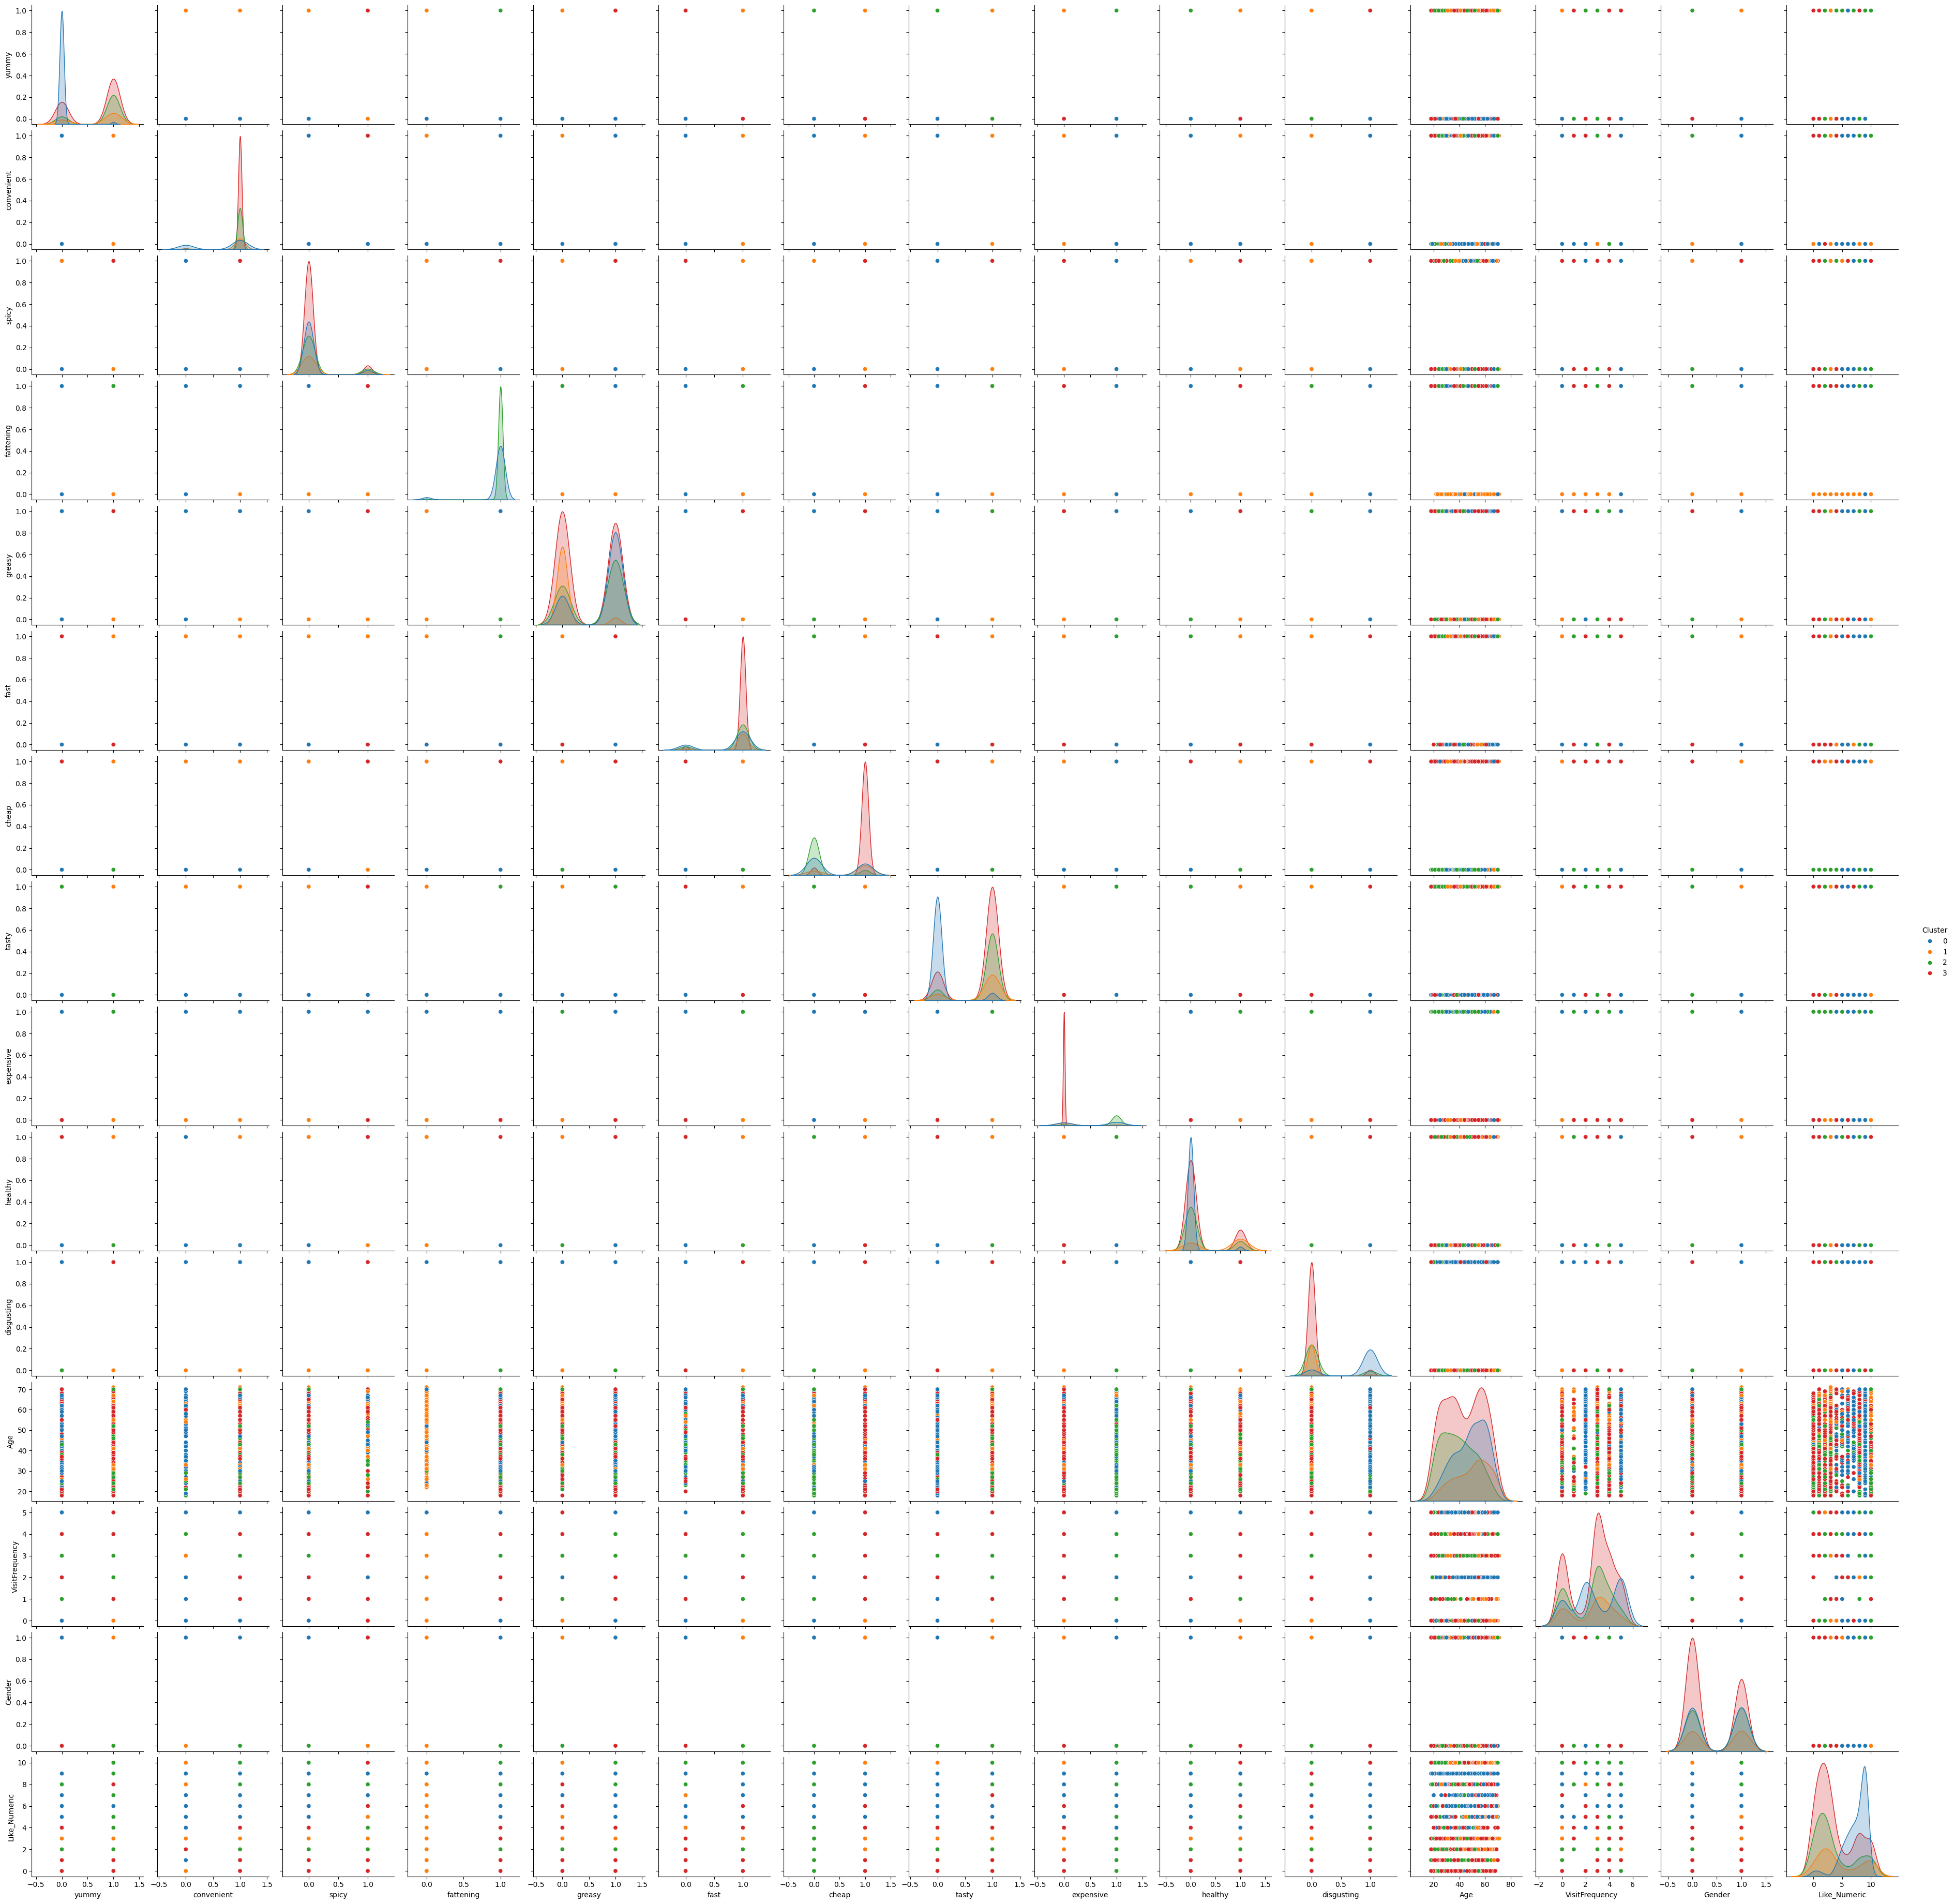

<ipython-input-25-73343ea59f40>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette='coolwarm')


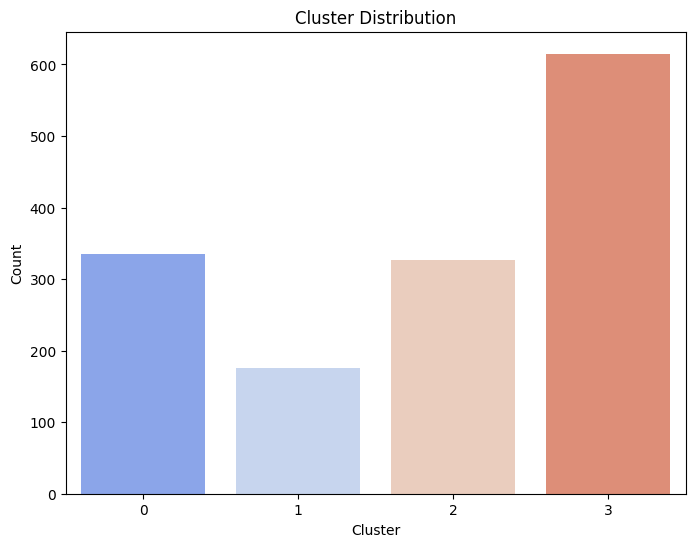

In [25]:
# Step 6: Analyze Cluster Profiles
cluster_profile = df.groupby('Cluster')[features].agg({
    'yummy': 'mean',
    'convenient': 'mean',
    'spicy': 'mean',
    'fattening': 'mean',
    'greasy': 'mean',
    'fast': 'mean',
    'cheap': 'mean',
    'tasty': 'mean',
    'expensive': 'mean',
    'healthy': 'mean',
    'disgusting': 'mean',
    'Age': 'mean',
    'VisitFrequency': 'mean',
    'Gender': 'mean',
    'Like': lambda x: x.astype(str).str.extract(r'([-+]?\d+)').astype(float).mean()  # Extract and convert to float for mean calculation
})

print("Cluster Profiles:")
print(cluster_profile)

# Step 7: Visualize Clusters Using a Pairplot
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='tab10')
plt.show()

# Step 8: Visualize Cluster Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Cluster'], palette='coolwarm')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


## Cluster Interpretation

**Cluster 0:** Health-Conscious Group - Low on greasy/fattening, prefers healthy options.  
**Cluster 1:** Taste Lovers - High on yummy, tasty, and spicy factors.  
**Cluster 2:** Value Seekers - Prefer cheap and convenient, less concerned about health.  
**Cluster 3:** Indifferent/Dislikers - High on disgusting/fattening, low on "Like".

These profiles help McDonald's understand how to target each segment with personalized marketing strategies.



## Recommendations

1. **Health-Conscious Group:** Introduce more healthy menu options, market low-calorie meals.
2. **Taste Lovers:** Promote new tasty/spicy items and limited-time flavors.
3. **Value Seekers:** Focus on combo offers, value meals, and coupons.
4. **Indifferent/Dislikers:** Gather feedback to improve experience or reduce negatives like greasiness.

